# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

# Importing Modules and Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("tracks.csv")

# Exploratory Data Analysis (EDA)

In [7]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [8]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


<Axes: >

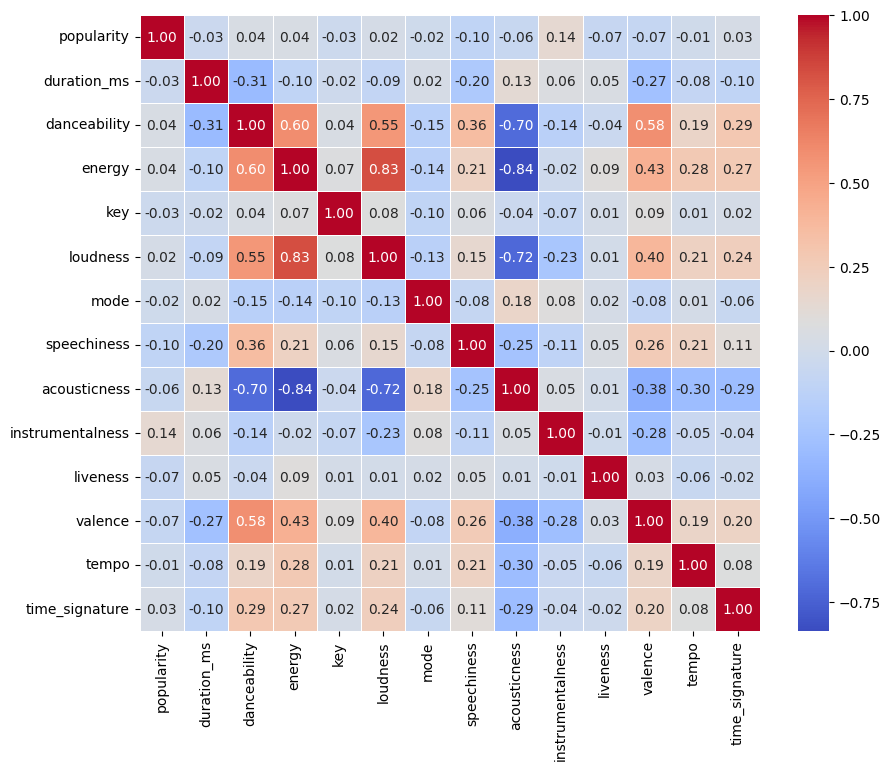

In [10]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

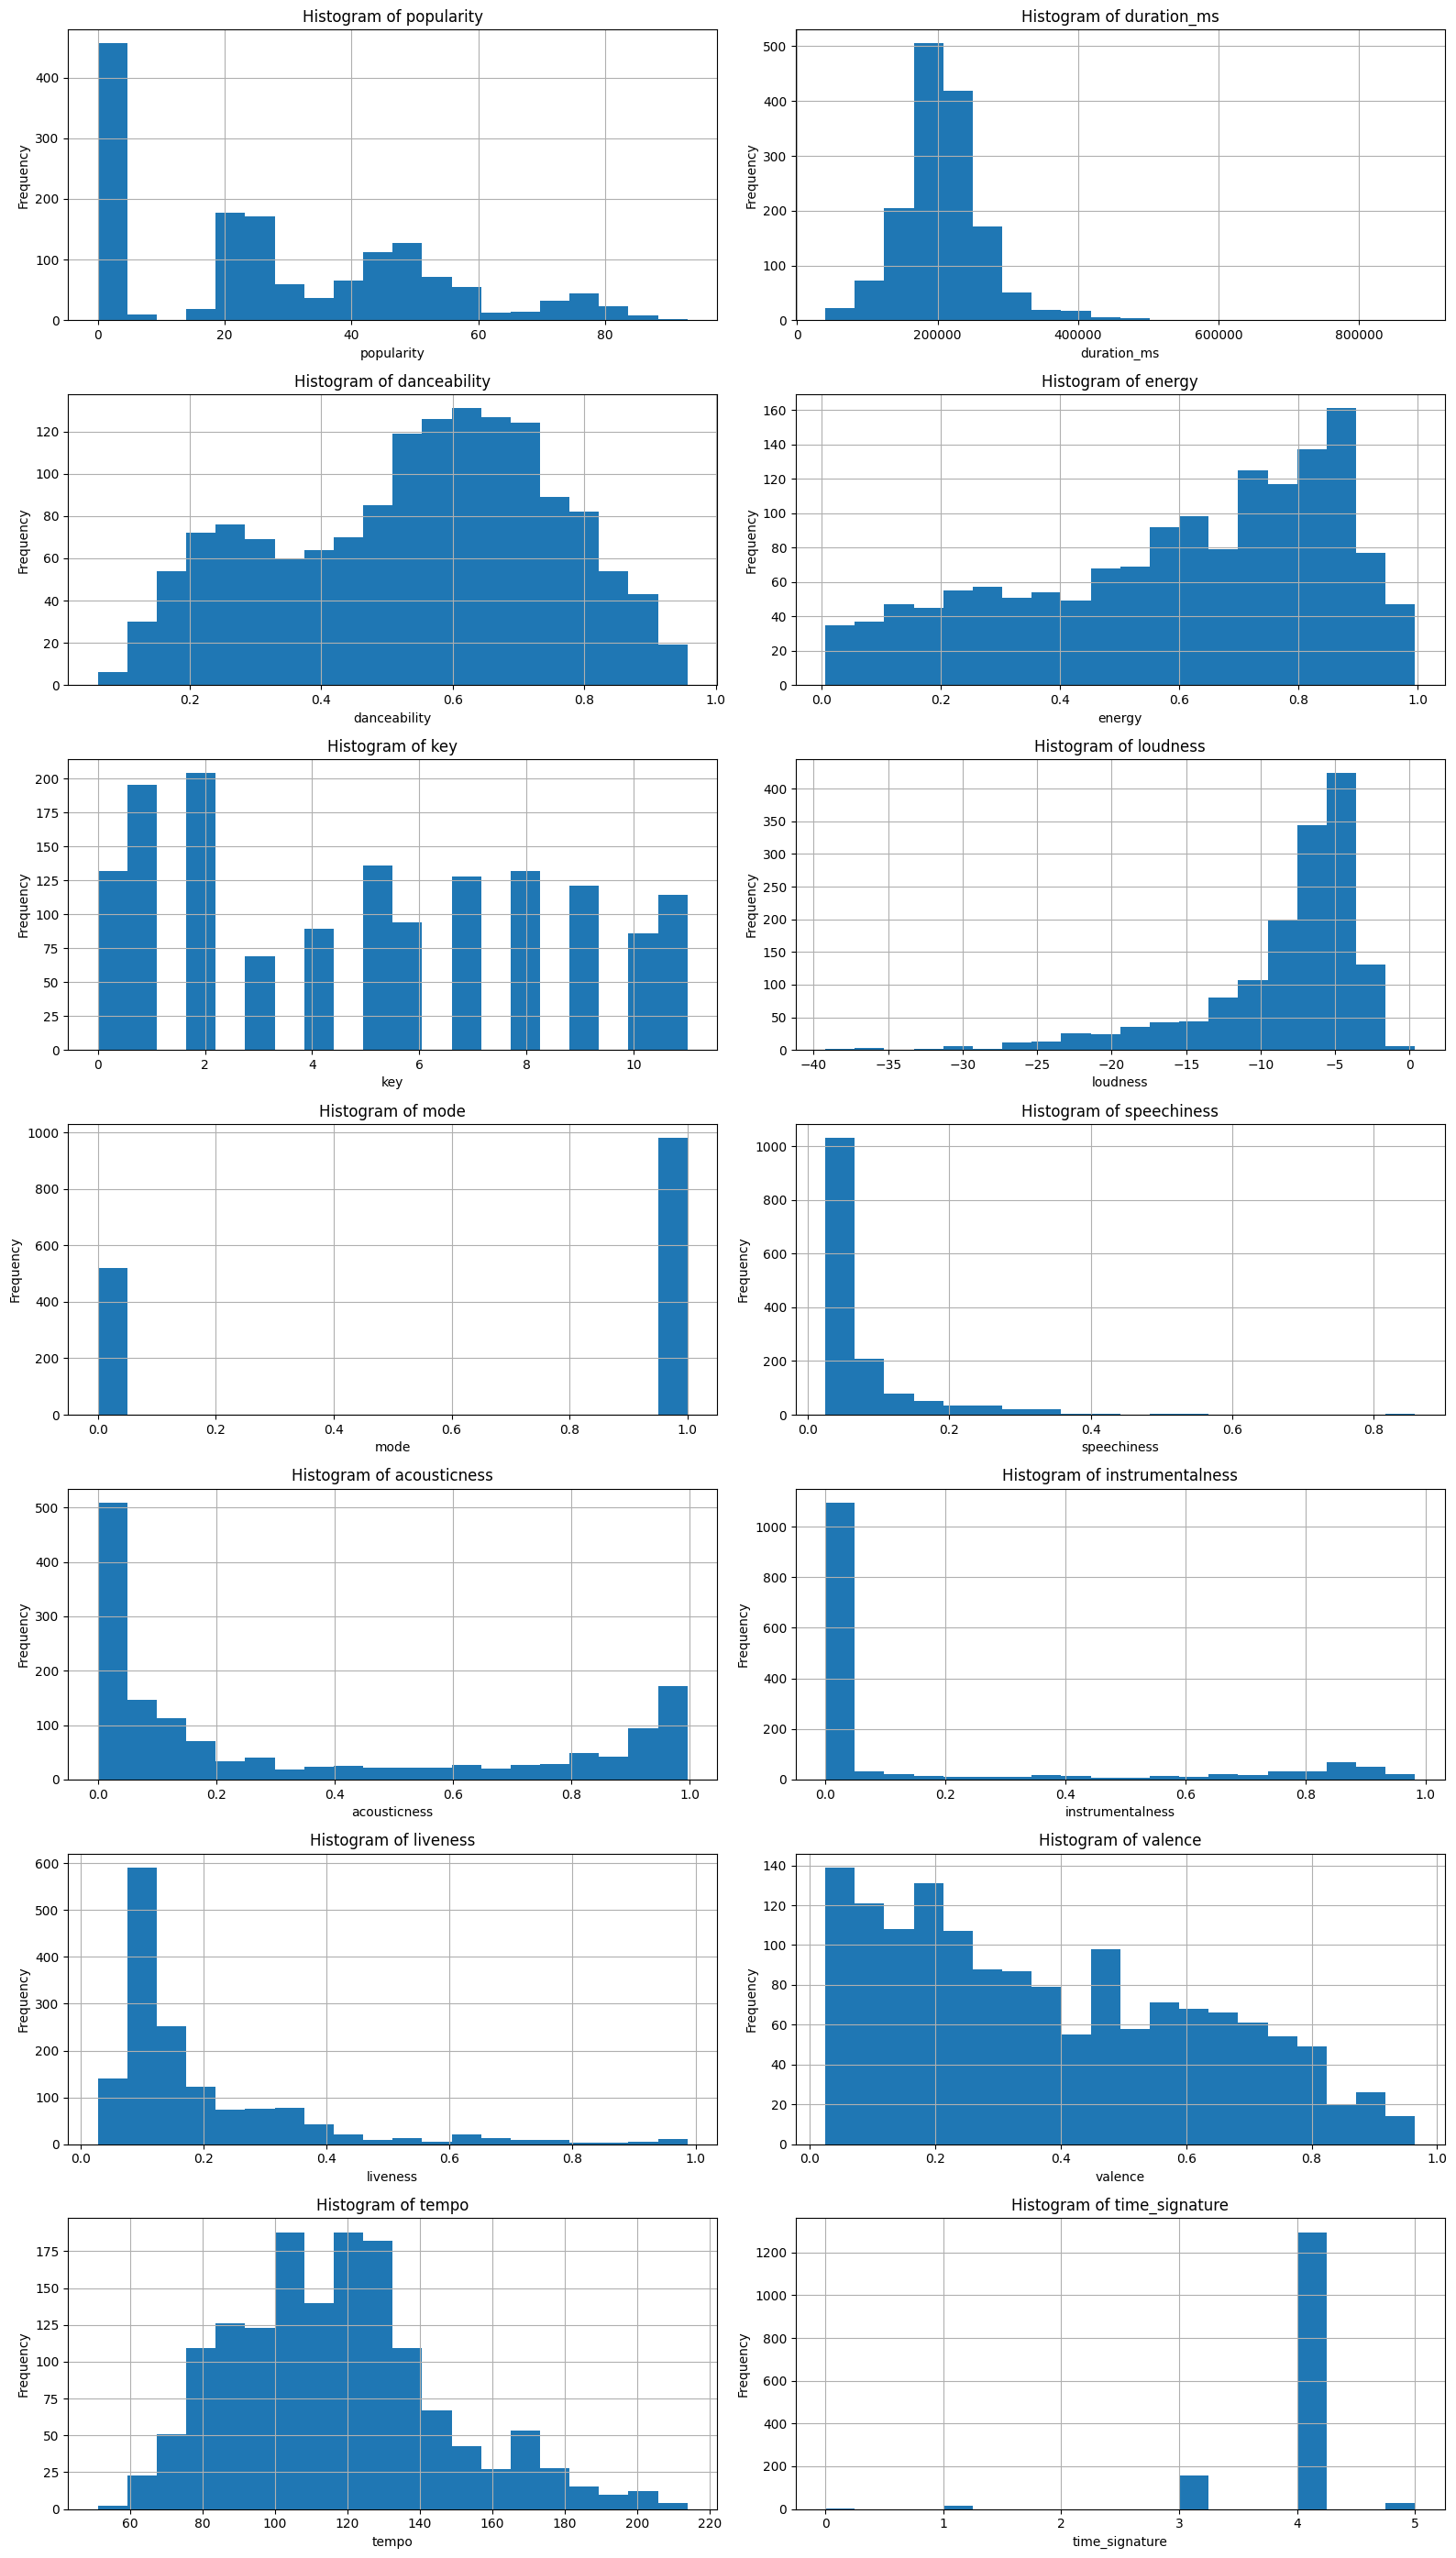

In [11]:

# List of features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()